<a href="https://colab.research.google.com/github/mohnishsachdeva/apriori-algo/blob/main/Apriori_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Import dataset from Local drive
from google.colab import files
uploaded = files.upload()

Saving retail_dataset.csv to retail_dataset.csv


In [4]:
#Fetch dataset
dataset = pd.read_csv('retail_dataset.csv')
dataset.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [5]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
print(dataset)

          0       1       2       3       4       5       6
0     Bread    Wine    Eggs    Meat  Cheese  Pencil  Diaper
1     Bread  Cheese    Meat  Diaper    Wine    Milk  Pencil
2    Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
3    Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
4      Meat  Pencil    Wine     NaN     NaN     NaN     NaN
..      ...     ...     ...     ...     ...     ...     ...
310   Bread    Eggs  Cheese     NaN     NaN     NaN     NaN
311    Meat    Milk  Pencil     NaN     NaN     NaN     NaN
312   Bread  Cheese    Eggs    Meat  Pencil  Diaper    Wine
313    Meat  Cheese     NaN     NaN     NaN     NaN     NaN
314    Eggs    Wine   Bagel   Bread    Meat     NaN     NaN

[315 rows x 7 columns]


In [7]:
#Print Total number of Rows & columns in dataset
print(dataset.shape[1])

7


In [8]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


In [9]:
types = dataset.dtypes
print(types)

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object


In [10]:
#Count total number of classes in Data
items = (dataset['0'].unique())
items


array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [11]:
dataset.isnull().sum()

0      0
1     30
2     70
3    128
4    182
5    244
6    274
dtype: int64

In [12]:
#Create list 
transactions = []
for i in range(0, dataset.shape[0]):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 7)])

transactions
print(i)

314


The apriori function expects data in a one-hot encoded pandas DataFrame. We can transform it into the right format via the TransactionEncoder as follows:

In [13]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)



In [14]:
te_ary


array([[False,  True,  True, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True, False],
       [False, False,  True, ..., False,  True,  True],
       ...,
       [False,  True,  True, ...,  True,  True, False],
       [False, False,  True, ..., False, False,  True],
       [ True,  True, False, ..., False,  True,  True]])

In [15]:
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)

     Bagel  Bread  Cheese  Diaper   Eggs   Meat   Milk  Pencil   Wine    nan
0    False   True    True    True   True   True  False    True   True  False
1    False   True    True    True  False   True   True    True   True  False
2    False  False    True   False   True   True   True   False   True   True
3    False  False    True   False   True   True   True   False   True   True
4    False  False   False   False  False   True  False    True   True   True
..     ...    ...     ...     ...    ...    ...    ...     ...    ...    ...
310  False   True    True   False   True  False  False   False  False   True
311  False  False   False   False  False   True   True    True  False   True
312  False   True    True    True   True   True  False    True   True  False
313  False  False    True   False  False   True  False   False  False   True
314   True   True   False   False   True   True  False   False   True   True

[315 rows x 10 columns]


In [16]:
df=df[['Bagel','Bread','Cheese','Diaper','Eggs','Meat','Milk','Pencil','Wine']]

In [17]:
df.drop(['nan'], axis = 1)

KeyError: ignored

In [18]:
print(df)

     Bagel  Bread  Cheese  Diaper   Eggs   Meat   Milk  Pencil   Wine
0    False   True    True    True   True   True  False    True   True
1    False   True    True    True  False   True   True    True   True
2    False  False    True   False   True   True   True   False   True
3    False  False    True   False   True   True   True   False   True
4    False  False   False   False  False   True  False    True   True
..     ...    ...     ...     ...    ...    ...    ...     ...    ...
310  False   True    True   False   True  False  False   False  False
311  False  False   False   False  False   True   True    True  False
312  False   True    True    True   True   True  False    True   True
313  False  False    True   False  False   True  False   False  False
314   True   True   False   False   True   True  False   False   True

[315 rows x 9 columns]


In [19]:
freq_items = apriori(df, min_support=0.2, use_colnames=True)
freq_items

,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
5,0.476190,(Meat)
6,0.501587,(Milk)
7,0.361905,(Pencil)
8,0.438095,(Wine)
9,0.279365,"(Bagel, Bread)"


In [20]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
2,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
4,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
5,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
6,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
7,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
8,"(Eggs, Meat)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667
9,"(Eggs, Cheese)",(Meat),0.298413,0.476190,0.215873,0.723404,1.519149,0.073772,1.893773


In [21]:
list(rules)

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

In [22]:
print(len(rules))

14


In [23]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,length
0,0.425397,(Bagel),1
1,0.504762,(Bread),1
2,0.501587,(Cheese),1
3,0.406349,(Diaper),1
4,0.438095,(Eggs),1
5,0.476190,(Meat),1
6,0.501587,(Milk),1
7,0.361905,(Pencil),1
8,0.438095,(Wine),1
9,0.279365,"(Bagel, Bread)",2


In [24]:
freq_items[ (freq_items['length'] == 2) &
                   (freq_items['support'] >= 0.3) ]

,support,itemsets,length
19,0.323810,"(Meat, Cheese)",2
20,0.304762,"(Milk, Cheese)",2


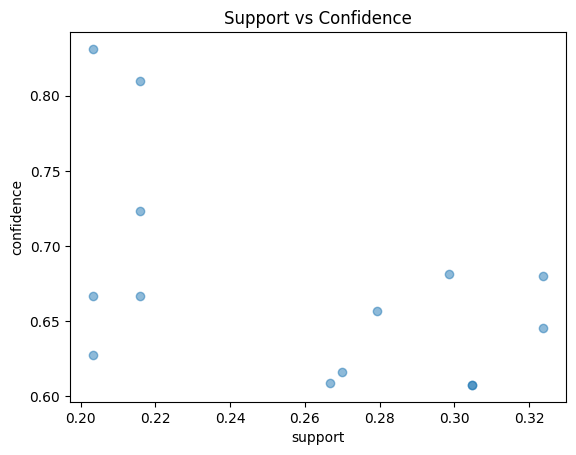

In [25]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

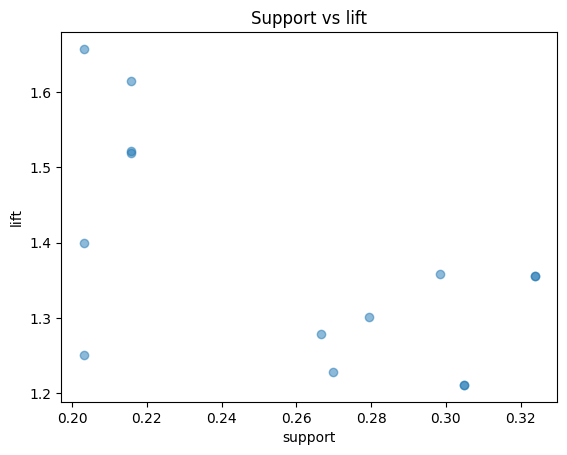

In [26]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

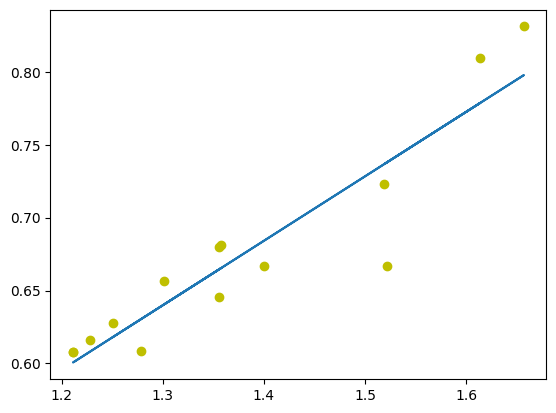

In [27]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))